In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from dt_utils import *
from nn_utils import *

In [61]:
# signal
s0 = pd.read_csv ( "signal.csv" )
s1 = pd.read_csv ( "0.csv" )
s2 = pd.read_csv ( "30.csv" )
s3 = pd.read_csv ( "60.csv" )

# bkg
b1 = pd.read_csv ( "sideband.csv" )
b2 = pd.read_csv ( "nearsignal.csv" )

In [62]:
s0.head()

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,1.776711,0.143551,2.339913,0.801155,135.346735,0.617557,-0.138064,-0.431957,0.798151,0.918964,508.706277,654.761522,1
1,2.297378,2.596617,0.807411,2.444087,192.951830,0.120380,0.579830,-0.076104,0.825476,0.125623,398.245685,666.181151,1
2,0.193672,1.353251,2.078824,0.027977,279.534325,0.324613,-0.113941,0.400439,0.620220,0.962265,688.912306,865.764571,1
3,0.339953,0.732237,2.169004,0.763360,211.562942,0.351223,-0.210501,-0.403187,0.334395,0.774680,722.718271,962.753343,1
4,1.367030,0.599763,2.644733,0.237751,363.096357,0.505595,-0.811117,0.939705,0.072341,0.745196,735.070052,991.462335,1


In [63]:
# total bkg
b = pd.concat([b1,b2])
b = shuffle(b,random_state=42).reset_index(drop=True)
b.head()

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,2.920753,1.090986,1.733981,0.137239,268.494580,0.653567,0.682121,0.917943,0.971721,0.566443,1268.745280,1430.672788,0
1,2.835025,1.946042,1.402751,2.896944,201.750574,0.781232,-0.180910,-0.915062,0.501745,0.743011,716.177864,923.922878,0
2,2.973645,2.530269,1.016207,1.918484,291.116294,0.412756,-0.916697,-0.677089,0.732552,0.761561,673.165946,807.950518,0
3,1.654473,1.665302,2.096471,0.131641,315.002068,0.144500,-0.940423,0.789105,0.133557,0.407656,837.942784,977.678059,0
4,2.122228,1.143082,0.394234,0.968614,235.680119,0.006688,0.710969,-0.932373,0.739628,0.535162,523.067557,702.426124,0


In [64]:
s0.columns

Index(['phib', 'phif', 'phitstar', 'phiw', 't', 'thetab', 'thetaf', 'thetah',
       'thetat', 'thetaw', 'tt', 'tth', 'isSignal'],
      dtype='object')

In [65]:
c0 = ['phib', 'phif', 'phitstar', 'phiw', 't', 'thetab', 'thetaf', 'thetah','thetat', 'thetaw', 'tt', 'tth']

In [66]:
s0.shape,s1.shape,s2.shape,s3.shape

((89694, 13), (38100, 13), (138901, 13), (138005, 13))

In [67]:
b.shape

(11106, 13)

In [68]:
# sample signal: alpha = 0
S0 = s0.sample(b.shape[0], random_state=42)

# training dataset
train0 = pd.concat([S0,b])

# Shuffle training dataset
train0 = shuffle(train0,random_state=42).reset_index(drop=True)
train0

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,2.666109,0.659017,1.218142,0.900543,402.820879,0.453174,0.066293,-0.946580,0.347793,0.706379,980.827796,1179.845163,0
1,2.633734,1.050419,1.514080,0.070999,146.588285,0.618619,-0.405857,0.778213,0.962535,0.858379,487.019795,653.468546,0
2,0.191305,1.442063,1.512599,0.471443,160.697518,0.835139,-0.061159,0.823676,0.081424,0.956929,636.961543,841.914035,0
3,2.400480,2.663370,1.923765,0.201620,159.861300,0.707089,-0.929448,-0.394958,0.362984,0.362894,976.467591,1110.236748,0
4,1.695086,1.560961,1.073626,2.521570,216.780803,0.081038,0.767695,0.565900,0.481670,0.486634,403.705295,540.959798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,0.617145,1.558053,2.009384,0.422967,689.344578,0.567627,-0.789562,0.712741,0.697871,0.001010,1087.259019,1303.505239,0
22208,2.253724,1.330466,2.475894,1.290946,167.627370,0.422291,0.933522,0.991576,0.518758,0.417906,319.781103,472.132595,0
22209,0.365679,0.677268,0.224996,0.425373,305.557591,0.669171,0.525061,-0.504132,0.819277,0.935351,691.898581,1069.158433,1
22210,1.738181,0.090726,0.798579,0.720761,202.484821,0.431400,0.749478,0.927048,0.704881,0.271640,486.169936,601.450578,1


In [69]:
# Keras imports
from tensorflow . keras . models import Sequential
from tensorflow . keras . layers import Dense
from tensorflow . keras . layers import Dropout
from sklearn import model_selection , preprocessing

## signal vs. background

In [70]:
# Standardize
sc0 = preprocessing . StandardScaler ()
input_data0 = sc0 . fit_transform ( train0[c0[0:12]] )
target0 = train0['isSignal']
# set random seed
Answer_to_all_questions = 42
# train - test split of dataset
train_data0 , test_data0 , train_target0 , test_target0 = model_selection . train_test_split (\
input_data0 , target0 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data0 . shape , train_target0 . shape , test_data0 . shape , test_target0 . shape )

(15548, 12) (15548,) (6664, 12) (6664,)


In [71]:
def my_model ( num_inputs , num_nodes , extra_depth ):
    # create model
    model = Sequential ()
    model . add ( Dense ( num_nodes , input_dim = num_inputs , kernel_initializer ='normal' , activation ='relu'))
    model . add ( Dropout (0.2))
    
    for i in range ( extra_depth ):
        # code up the extra layers here
        model . add ( Dense ( num_nodes , input_dim = num_inputs , kernel_initializer ='normal' , activation ='relu'))
        model . add ( Dropout (0.2))
        
    model . add ( Dense (1 , activation ='sigmoid'))
    # Compile model
    model . compile ( loss ='binary_crossentropy' , optimizer = 'adam', metrics =['accuracy'])
    return model

In [72]:
# Set early stop
from keras . callbacks import EarlyStopping , ModelCheckpoint

callbacks_ = [
# if we don ’t have an increase of the accuracy for 15 epochs , terminate training .
EarlyStopping ( verbose = True , patience =15 , monitor ='val_acc' ) ,
# Always make sure that we ’re saving the model weights with the best accuracy .
ModelCheckpoint ('model .h5' , monitor ='val_acc' , verbose =0 , save_best_only = True , mode ='max' )]

model0 = my_model(12,100,3)

history0 =  model0. fit ( train_data0 , train_target0 , batch_size = 200 , epochs = 300 , verbose =1 , validation_data =( test_data0 , test_target0 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - ETA: 12s - loss: 0.6930 - acc: 0.53 - ETA: 1s - loss: 0.6930 - acc: 0.5054 - ETA: 0s - loss: 0.6931 - acc: 0.503 - ETA: 0s - loss: 0.6928 - acc: 0.510 - ETA: 0s - loss: 0.6927 - acc: 0.511 - ETA: 0s - loss: 0.6918 - acc: 0.515 - 1s 68us/sample - loss: 0.6913 - acc: 0.5199 - val_loss: 0.6944 - val_acc: 0.5242
Epoch 2/300
15548/15548 [==============================] - ETA: 0s - loss: 0.7305 - acc: 0.430 - ETA: 0s - loss: 0.6898 - acc: 0.541 - ETA: 0s - loss: 0.6880 - acc: 0.547 - ETA: 0s - loss: 0.6871 - acc: 0.548 - ETA: 0s - loss: 0.6861 - acc: 0.552 - 0s 22us/sample - loss: 0.6851 - acc: 0.5543 - val_loss: 0.6804 - val_acc: 0.5666
Epoch 3/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6840 - acc: 0.505 - ETA: 0s - loss: 0.6755 - acc: 0.574 - ETA: 0s - loss: 0.6763 - acc: 0.575 - ETA: 0s - loss: 0.6765 - acc: 0.575 - ETA: 0s - loss: 0.6764 - acc: 0.576 - 0s 

15548/15548 [==============================] - ETA: 0s - loss: 0.6242 - acc: 0.645 - ETA: 0s - loss: 0.6247 - acc: 0.645 - ETA: 0s - loss: 0.6214 - acc: 0.642 - ETA: 0s - loss: 0.6239 - acc: 0.643 - ETA: 0s - loss: 0.6264 - acc: 0.641 - 0s 18us/sample - loss: 0.6275 - acc: 0.6398 - val_loss: 0.6387 - val_acc: 0.6241
Epoch 26/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6717 - acc: 0.595 - ETA: 0s - loss: 0.6292 - acc: 0.636 - ETA: 0s - loss: 0.6238 - acc: 0.640 - ETA: 0s - loss: 0.6248 - acc: 0.640 - ETA: 0s - loss: 0.6294 - acc: 0.634 - 0s 19us/sample - loss: 0.6293 - acc: 0.6360 - val_loss: 0.6431 - val_acc: 0.6182
Epoch 27/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6372 - acc: 0.645 - ETA: 0s - loss: 0.6363 - acc: 0.631 - ETA: 0s - loss: 0.6304 - acc: 0.635 - ETA: 0s - loss: 0.6277 - acc: 0.638 - ETA: 0s - loss: 0.6295 - acc: 0.635 - 0s 19us/sample - loss: 0.6289 - acc: 0.6364 - val_loss: 0.6395 - val_acc: 0.6244
Epoch 28/300
15548/1

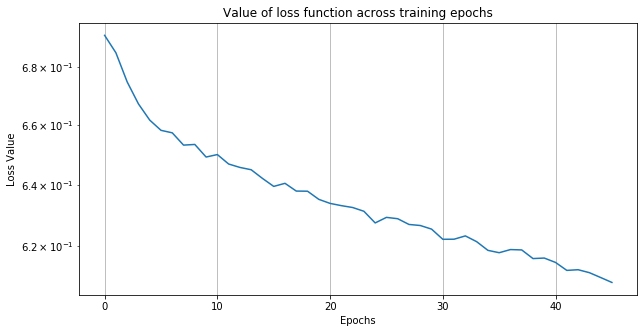

In [73]:
# Loss
lossplot(history0.history['loss'], scale='log');

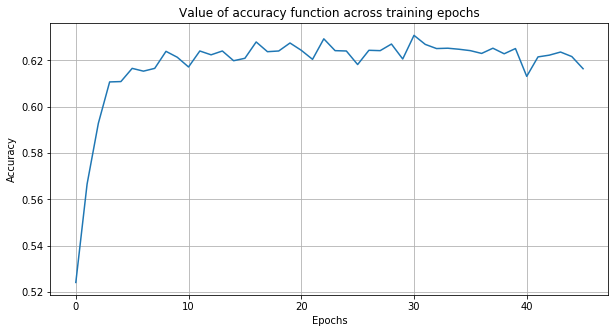

In [74]:
# Accuracy
accplot(history0.history['val_acc'], scale='linear')

In [75]:
from sklearn.metrics import confusion_matrix, roc_curve

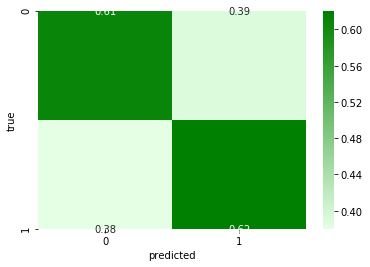

In [76]:
# Predictions
pred0 = model0.predict(test_data0)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred0:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target0.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

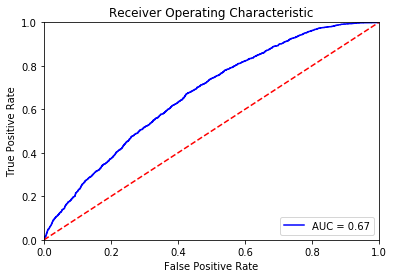

In [77]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target0, pred0)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP0 vs background

In [78]:
# sample signal: alpha = 0
S1 = s1.sample(b.shape[0], random_state=42)

# training dataset
train1 = pd.concat([S1,b])

# Shuffle training dataset
train1 = shuffle(train1,random_state=42).reset_index(drop=True)
train1

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,2.666109,0.659017,1.218142,0.900543,402.820879,0.453174,0.066293,-0.946580,0.347793,0.706379,980.827796,1179.845163,0
1,2.633734,1.050419,1.514080,0.070999,146.588285,0.618619,-0.405857,0.778213,0.962535,0.858379,487.019795,653.468546,0
2,0.191305,1.442063,1.512599,0.471443,160.697518,0.835139,-0.061159,0.823676,0.081424,0.956929,636.961543,841.914035,0
3,2.400480,2.663370,1.923765,0.201620,159.861300,0.707089,-0.929448,-0.394958,0.362984,0.362894,976.467591,1110.236748,0
4,2.602972,2.379159,1.428661,1.312775,228.193340,0.950061,-0.422071,-0.516657,0.610768,0.686665,940.026766,1123.360261,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,0.617145,1.558053,2.009384,0.422967,689.344578,0.567627,-0.789562,0.712741,0.697871,0.001010,1087.259019,1303.505239,0
22208,2.253724,1.330466,2.475894,1.290946,167.627370,0.422291,0.933522,0.991576,0.518758,0.417906,319.781103,472.132595,0
22209,3.026516,2.817986,2.652779,2.583968,405.074000,0.484208,0.017505,-0.902279,0.532101,0.789573,779.623333,941.757176,1
22210,2.832917,1.292186,1.424796,2.386450,162.580358,0.802640,0.909869,0.927811,0.933942,0.901298,1250.525708,1435.903622,1


In [79]:
# Standardize
sc1 = preprocessing . StandardScaler ()
input_data1 = sc1 . fit_transform ( train1[c0[0:12]] )
target1 = train1['isSignal']

# train - test split of dataset
train_data1 , test_data1 , train_target1 , test_target1 = model_selection . train_test_split (\
input_data1 , target1 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data1 . shape , train_target1 . shape , test_data1 . shape , test_target1 . shape )

(15548, 12) (15548,) (6664, 12) (6664,)


In [80]:
# train
model1 = my_model(12,100,2)
history1 =  model1. fit ( train_data1 , train_target1 , batch_size = 200 , epochs = 300 , verbose =1 , validation_data =( test_data1 , test_target1 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - ETA: 13s - loss: 0.6941 - acc: 0.46 - ETA: 1s - loss: 0.6920 - acc: 0.5161 - ETA: 0s - loss: 0.6918 - acc: 0.518 - ETA: 0s - loss: 0.6913 - acc: 0.522 - ETA: 0s - loss: 0.6911 - acc: 0.524 - ETA: 0s - loss: 0.6907 - acc: 0.529 - 1s 42us/sample - loss: 0.6907 - acc: 0.5293 - val_loss: 0.6862 - val_acc: 0.5513
Epoch 2/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6842 - acc: 0.590 - ETA: 0s - loss: 0.6866 - acc: 0.554 - ETA: 0s - loss: 0.6850 - acc: 0.558 - ETA: 0s - loss: 0.6850 - acc: 0.555 - ETA: 0s - loss: 0.6837 - acc: 0.562 - 0s 19us/sample - loss: 0.6834 - acc: 0.5632 - val_loss: 0.6755 - val_acc: 0.5741
Epoch 3/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6498 - acc: 0.685 - ETA: 0s - loss: 0.6707 - acc: 0.594 - ETA: 0s - loss: 0.6721 - acc: 0.588 - ETA: 0s - loss: 0.6730 - acc: 0.584 - ETA: 0s - loss: 0.6738 - acc: 0.583 - ETA

15548/15548 [==============================] - ETA: 0s - loss: 0.6228 - acc: 0.615 - ETA: 0s - loss: 0.6239 - acc: 0.640 - ETA: 0s - loss: 0.6330 - acc: 0.634 - ETA: 0s - loss: 0.6311 - acc: 0.638 - ETA: 0s - loss: 0.6332 - acc: 0.637 - 0s 17us/sample - loss: 0.6326 - acc: 0.6385 - val_loss: 0.6408 - val_acc: 0.6259
Epoch 25/300
15548/15548 [==============================] - ETA: 0s - loss: 0.5951 - acc: 0.660 - ETA: 0s - loss: 0.6302 - acc: 0.635 - ETA: 0s - loss: 0.6369 - acc: 0.632 - ETA: 0s - loss: 0.6338 - acc: 0.639 - ETA: 0s - loss: 0.6322 - acc: 0.641 - 0s 18us/sample - loss: 0.6321 - acc: 0.6403 - val_loss: 0.6413 - val_acc: 0.6235
Epoch 26/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6024 - acc: 0.695 - ETA: 0s - loss: 0.6230 - acc: 0.646 - ETA: 0s - loss: 0.6256 - acc: 0.649 - ETA: 0s - loss: 0.6261 - acc: 0.643 - ETA: 0s - loss: 0.6304 - acc: 0.638 - ETA: 0s - loss: 0.6313 - acc: 0.639 - 0s 23us/sample - loss: 0.6316 - acc: 0.6396 - val_loss: 0.6431 

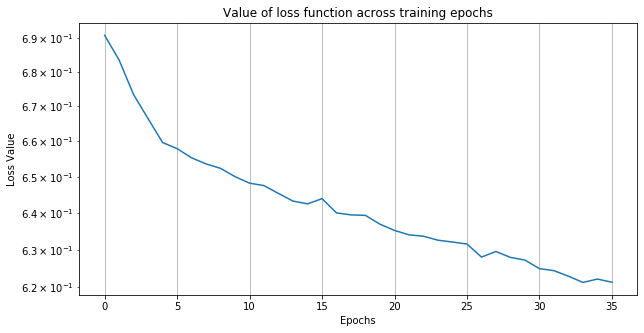

In [81]:
# Loss
lossplot(history1.history['loss'], scale='log');

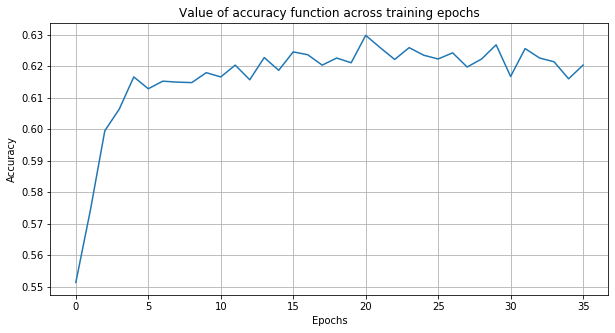

In [82]:
# Accuracy
accplot(history1.history['val_acc'], scale='linear')

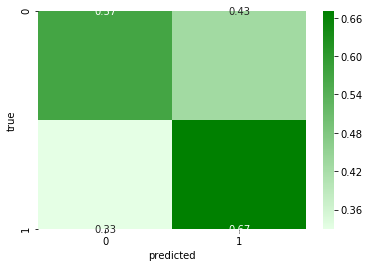

In [83]:
# Predictions
pred1 = model1.predict(test_data1)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred1:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target1.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

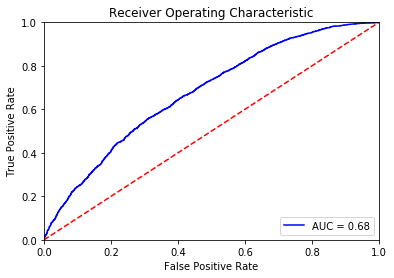

In [84]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target1, pred1)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP30 vs background

In [85]:
# sample signal: alpha = 30
S2 = s2.sample(b.shape[0], random_state=42)

# training dataset
train2 = pd.concat([S2,b])

# Shuffle training dataset
train2 = shuffle(train2,random_state=42).reset_index(drop=True)
train2

,phib,phif,phitstar,phiw,t,thetab,thetaf,thetah,thetat,thetaw,tt,tth,isSignal
0,2.666109,0.659017,1.218142,0.900543,402.820879,0.453174,0.066293,-0.946580,0.347793,0.706379,980.827796,1179.845163,0
1,2.633734,1.050419,1.514080,0.070999,146.588285,0.618619,-0.405857,0.778213,0.962535,0.858379,487.019795,653.468546,0
2,0.191305,1.442063,1.512599,0.471443,160.697518,0.835139,-0.061159,0.823676,0.081424,0.956929,636.961543,841.914035,0
3,2.400480,2.663370,1.923765,0.201620,159.861300,0.707089,-0.929448,-0.394958,0.362984,0.362894,976.467591,1110.236748,0
4,2.491433,2.269836,1.181117,0.091614,186.164601,0.343710,-0.292384,0.821720,0.755152,0.409148,542.640597,742.676967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,0.617145,1.558053,2.009384,0.422967,689.344578,0.567627,-0.789562,0.712741,0.697871,0.001010,1087.259019,1303.505239,0
22208,2.253724,1.330466,2.475894,1.290946,167.627370,0.422291,0.933522,0.991576,0.518758,0.417906,319.781103,472.132595,0
22209,0.481244,1.946183,2.552701,0.417852,505.336020,0.226118,-0.510475,0.936356,0.904859,0.551216,809.720852,1168.876785,1
22210,1.151755,1.792614,1.338921,1.842647,143.370840,0.753826,-0.518286,0.051884,0.399060,0.479292,444.438552,658.352398,1


In [86]:
# Standardize
sc2 = preprocessing . StandardScaler ()
input_data2 = sc2 . fit_transform ( train2[c0[0:12]] )
target2 = train2['isSignal']

# train - test split of dataset
train_data2 , test_data2 , train_target2 , test_target2 = model_selection . train_test_split (\
input_data2 , target2 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data2 . shape , train_target2 . shape , test_data2 . shape , test_target2 . shape )

(15548, 12) (15548,) (6664, 12) (6664,)


In [87]:
# train
model2 = my_model(12,100,2)
history2 =  model2. fit ( train_data2 , train_target2 , batch_size = 200 , epochs = 300 , verbose =1 , validation_data =( test_data2 , test_target2 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - ETA: 12s - loss: 0.6959 - acc: 0.48 - ETA: 1s - loss: 0.6937 - acc: 0.4986 - ETA: 0s - loss: 0.6935 - acc: 0.499 - ETA: 0s - loss: 0.6932 - acc: 0.501 - ETA: 0s - loss: 0.6924 - acc: 0.510 - ETA: 0s - loss: 0.6914 - acc: 0.516 - 1s 42us/sample - loss: 0.6908 - acc: 0.5191 - val_loss: 0.6864 - val_acc: 0.5489
Epoch 2/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6786 - acc: 0.575 - ETA: 0s - loss: 0.6855 - acc: 0.553 - ETA: 0s - loss: 0.6844 - acc: 0.551 - ETA: 0s - loss: 0.6833 - acc: 0.554 - ETA: 0s - loss: 0.6824 - acc: 0.556 - 0s 20us/sample - loss: 0.6817 - acc: 0.5583 - val_loss: 0.6700 - val_acc: 0.5923
Epoch 3/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6784 - acc: 0.575 - ETA: 0s - loss: 0.6718 - acc: 0.586 - ETA: 0s - loss: 0.6711 - acc: 0.584 - ETA: 0s - loss: 0.6724 - acc: 0.584 - 0s 18us/sample - loss: 0.6709 - acc: 0.58

15548/15548 [==============================] - ETA: 0s - loss: 0.6318 - acc: 0.630 - ETA: 0s - loss: 0.6298 - acc: 0.638 - ETA: 0s - loss: 0.6277 - acc: 0.639 - ETA: 0s - loss: 0.6295 - acc: 0.637 - ETA: 0s - loss: 0.6289 - acc: 0.636 - 0s 18us/sample - loss: 0.6273 - acc: 0.6382 - val_loss: 0.6381 - val_acc: 0.6282
Epoch 27/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6238 - acc: 0.615 - ETA: 0s - loss: 0.6263 - acc: 0.639 - ETA: 0s - loss: 0.6275 - acc: 0.640 - ETA: 0s - loss: 0.6278 - acc: 0.641 - 0s 17us/sample - loss: 0.6271 - acc: 0.6410 - val_loss: 0.6340 - val_acc: 0.6357
Epoch 28/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6040 - acc: 0.630 - ETA: 0s - loss: 0.6208 - acc: 0.639 - ETA: 0s - loss: 0.6239 - acc: 0.637 - ETA: 0s - loss: 0.6231 - acc: 0.638 - ETA: 0s - loss: 0.6245 - acc: 0.642 - 0s 18us/sample - loss: 0.6246 - acc: 0.6421 - val_loss: 0.6345 - val_acc: 0.6298
Epoch 29/300
15548/15548 [==============================] 

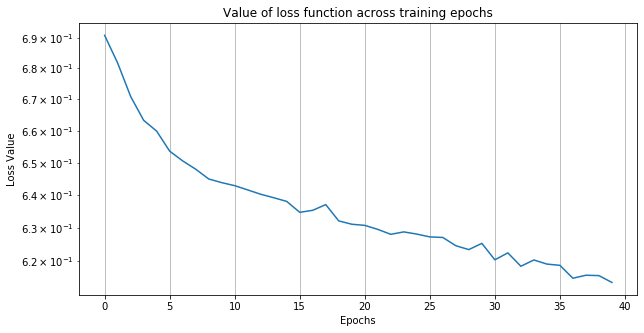

In [88]:
# Loss
lossplot(history2.history['loss'], scale='log');

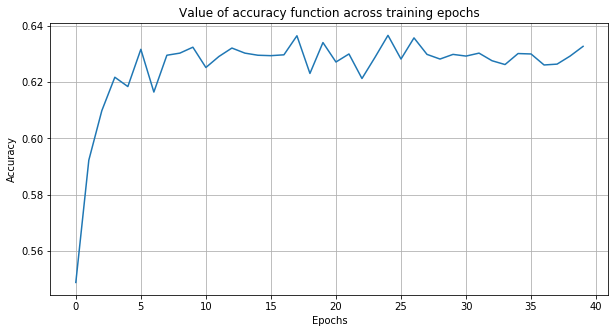

In [89]:
# Accuracy
accplot(history2.history['val_acc'], scale='linear')

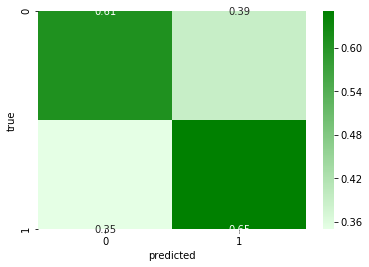

In [90]:
# Predictions
pred2 = model2.predict(test_data2)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred2:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target2.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

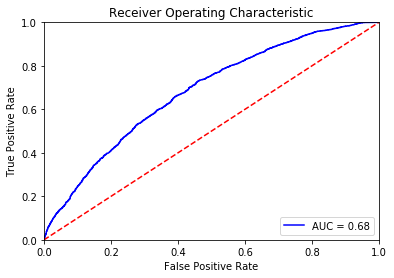

In [91]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target2, pred2)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP60 vs. background

In [92]:
# sample signal: alpha = 30
S3 = s3.sample(b.shape[0], random_state=42)

# training dataset
train3 = pd.concat([S3,b])

# Shuffle training dataset
train3 = shuffle(train3,random_state=42).reset_index(drop=True)

In [93]:
# Standardize
sc3 = preprocessing . StandardScaler ()
input_data3 = sc3 . fit_transform ( train3[c0[0:12]] )
target3 = train3['isSignal']

# train - test split of dataset
train_data3 , test_data3 , train_target3 , test_target3 = model_selection . train_test_split (\
input_data3 , target3 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data3 . shape , train_target3 . shape , test_data3 . shape , test_target3 . shape )

(15548, 12) (15548,) (6664, 12) (6664,)


In [107]:
# train
model3 = my_model(12,200,2)
history3 =  model3. fit ( train_data3 , train_target3 , batch_size = 300 , epochs = 300 , verbose =1 , validation_data =( test_data3 , test_target3 ) , callbacks = callbacks_ )

Train on 15548 samples, validate on 6664 samples
Epoch 1/300
15548/15548 [==============================] - ETA: 10s - loss: 0.6928 - acc: 0.51 - ETA: 1s - loss: 0.6930 - acc: 0.5143 - ETA: 0s - loss: 0.6896 - acc: 0.530 - ETA: 0s - loss: 0.6886 - acc: 0.537 - ETA: 0s - loss: 0.6881 - acc: 0.542 - 1s 49us/sample - loss: 0.6851 - acc: 0.5514 - val_loss: 0.6751 - val_acc: 0.5770
Epoch 2/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6771 - acc: 0.590 - ETA: 0s - loss: 0.6740 - acc: 0.583 - ETA: 0s - loss: 0.6668 - acc: 0.595 - ETA: 0s - loss: 0.6676 - acc: 0.593 - ETA: 0s - loss: 0.6672 - acc: 0.596 - 0s 20us/sample - loss: 0.6660 - acc: 0.5983 - val_loss: 0.6498 - val_acc: 0.6265
Epoch 3/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6393 - acc: 0.650 - ETA: 0s - loss: 0.6520 - acc: 0.610 - ETA: 0s - loss: 0.6500 - acc: 0.615 - ETA: 0s - loss: 0.6487 - acc: 0.618 - ETA: 0s - loss: 0.6477 - acc: 0.620 - 0s 20us/sample - loss: 0.6452 - acc: 0.62

Epoch 25/300
15548/15548 [==============================] - ETA: 0s - loss: 0.5567 - acc: 0.716 - ETA: 0s - loss: 0.5926 - acc: 0.676 - ETA: 0s - loss: 0.5837 - acc: 0.685 - ETA: 0s - loss: 0.5847 - acc: 0.683 - ETA: 0s - loss: 0.5878 - acc: 0.681 - 0s 19us/sample - loss: 0.5912 - acc: 0.6800 - val_loss: 0.6158 - val_acc: 0.6564
Epoch 26/300
15548/15548 [==============================] - ETA: 0s - loss: 0.6342 - acc: 0.646 - ETA: 0s - loss: 0.5830 - acc: 0.688 - ETA: 0s - loss: 0.5861 - acc: 0.684 - ETA: 0s - loss: 0.5875 - acc: 0.685 - 0s 16us/sample - loss: 0.5875 - acc: 0.6854 - val_loss: 0.6137 - val_acc: 0.6552
Epoch 27/300
15548/15548 [==============================] - ETA: 0s - loss: 0.5963 - acc: 0.660 - ETA: 0s - loss: 0.5792 - acc: 0.684 - ETA: 0s - loss: 0.5795 - acc: 0.685 - ETA: 0s - loss: 0.5846 - acc: 0.683 - 0s 17us/sample - loss: 0.5859 - acc: 0.6809 - val_loss: 0.6156 - val_acc: 0.6574
Epoch 28/300
15548/15548 [==============================] - ETA: 0s - loss: 0.5772 

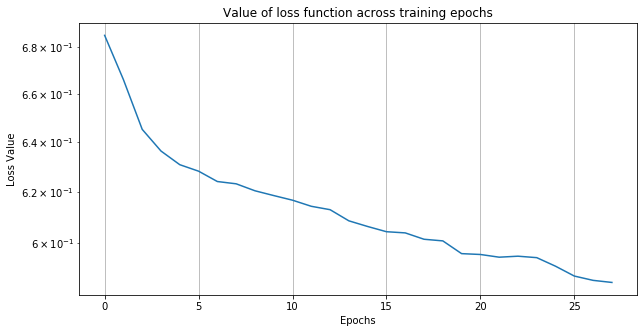

In [108]:
# Loss
lossplot(history3.history['loss'], scale='log');

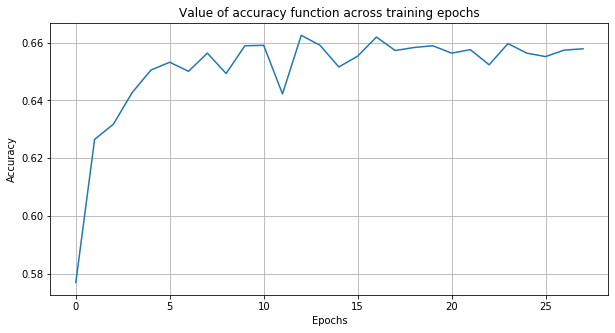

In [109]:
# Accuracy
accplot(history3.history['val_acc'], scale='linear')

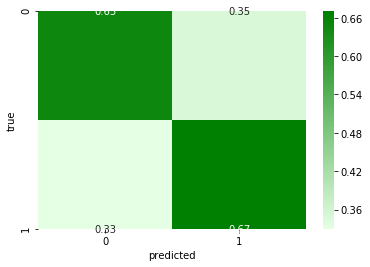

In [110]:
# Predictions
pred3 = model3.predict(test_data3)

# Convert probabilities into binary outputs
bi = []
p = []
for i in pred3:
    if i[0]>0.5:
        bi.append(1)
        p.append(i[0])
    else:
        bi.append(0)
        p.append(i[0])
        
# Define confusion matrix and classes
cm = confusion_matrix(test_target3.tolist(),bi)
classes=[0,1]

# Plot heat map
heatmap(cm,normalize=True,labels=['predicted','true'],classes=[['0','1'],['0','1']])

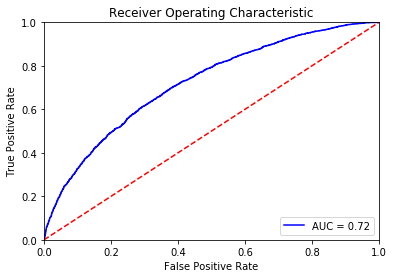

In [111]:
# Calculate false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(test_target3, pred3)
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## CP0, 30 and 60

In [99]:
# ML imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Custom imports
import daml
from daml import plot, utilities, optimisation

In [100]:
s1.shape, s2.shape, s3.shape

((38100, 13), (138901, 13), (138005, 13))

In [101]:
cp0 = s1
cp0.insert(13,'alpha',0)
cp30 = s2.sample(s1.shape[0], random_state=42)
cp30.insert(13,'alpha',1)
cp60 = s3.sample(s1.shape[0], random_state=42)
cp60.insert(13,'alpha',2)

In [102]:
# training dataset
train4 = pd.concat([cp0,cp30,cp60])

# Shuffle training dataset
train4 = shuffle(train4,random_state=42).reset_index(drop=True)

# Standardize
sc4 = preprocessing . StandardScaler ()
input_data4 = sc4 . fit_transform ( train4[c0[0:12]] )
target4 = train4['alpha']

# train - test split of dataset
train_data4 , test_data4 , train_target4 , test_target4 = model_selection . train_test_split (\
input_data4 , target4 , test_size =0.3 , random_state = Answer_to_all_questions )
# Check shape
print ( train_data4 . shape , train_target4 . shape , test_data4 . shape , test_target4 . shape )

(80010, 12) (80010,) (34290, 12) (34290,)


In [140]:
def smallmodel (name):
    # Create a NW
    input_tensor = Input(shape=(12,))
    H1 = Dense(100, activation='relu')(input_tensor)
    output_tensor = Dense(3, activation='softmax')(H1)
    model = Model(input_tensor, output_tensor,name = name)
    # Compile the model
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

# Get the model
model4 = smallmodel('Small model (standard)')
model4.summary()

Model: "Small model (standard)"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_61 (Dense)             (None, 100)               1300      
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 303       
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [141]:
# Compile and fit
cp = model4.fit(train_data4,train_target4,batch_size=500,epochs=300,validation_split=0.3,shuffle=True,verbose=2, callbacks = callbacks_)

Train on 56007 samples, validate on 24003 samples
Epoch 1/300
56007/56007 - 1s - loss: 1.1070 - acc: 0.3451 - val_loss: 1.0992 - val_acc: 0.3520
Epoch 2/300
56007/56007 - 0s - loss: 1.0960 - acc: 0.3623 - val_loss: 1.0964 - val_acc: 0.3641
Epoch 3/300
56007/56007 - 0s - loss: 1.0933 - acc: 0.3661 - val_loss: 1.0954 - val_acc: 0.3688
Epoch 4/300
56007/56007 - 0s - loss: 1.0918 - acc: 0.3707 - val_loss: 1.0949 - val_acc: 0.3669
Epoch 5/300
56007/56007 - 0s - loss: 1.0910 - acc: 0.3747 - val_loss: 1.0948 - val_acc: 0.3710
Epoch 6/300
56007/56007 - 0s - loss: 1.0908 - acc: 0.3734 - val_loss: 1.0948 - val_acc: 0.3680
Epoch 7/300
56007/56007 - 0s - loss: 1.0901 - acc: 0.3770 - val_loss: 1.0937 - val_acc: 0.3732
Epoch 8/300
56007/56007 - 0s - loss: 1.0894 - acc: 0.3790 - val_loss: 1.0946 - val_acc: 0.3736
Epoch 9/300
56007/56007 - 0s - loss: 1.0897 - acc: 0.3766 - val_loss: 1.0940 - val_acc: 0.3720
Epoch 10/300
56007/56007 - 0s - loss: 1.0891 - acc: 0.3791 - val_loss: 1.0943 - val_acc: 0.3691

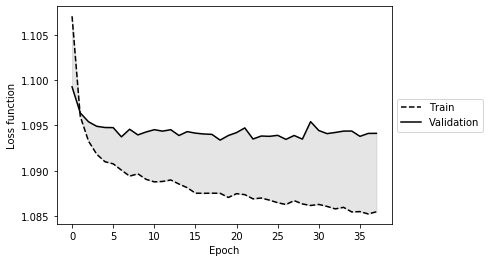

In [142]:
# Plot loss curves
daml.plot.loss(cp);

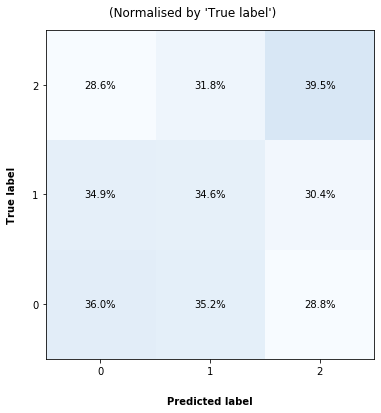

In [143]:
# Get predictions of X_test without weight
pred4 = model4.predict(test_data4)
pred4 = np.asarray([np.argmax(i) for i in pred4])
cm = confusion_matrix(pred4,test_target4)
daml.plot.confusion_matrix (cm, labels=None, normalise=True);